# How well do jobs and skills pay for Data Analysts?

## Methodology

1. Evaluate median salary for the top 6 data jobs
2. Find median salary per skill for data analysts
3. Visualize for highest paying skills and most demanded skills

In [1]:
#importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/Users/artbm01/Documents/Python-DataAnalysis/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Filter for the job title and country
df_US = df[(df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

# Get a list of the top 6 most common jobs
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()

df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

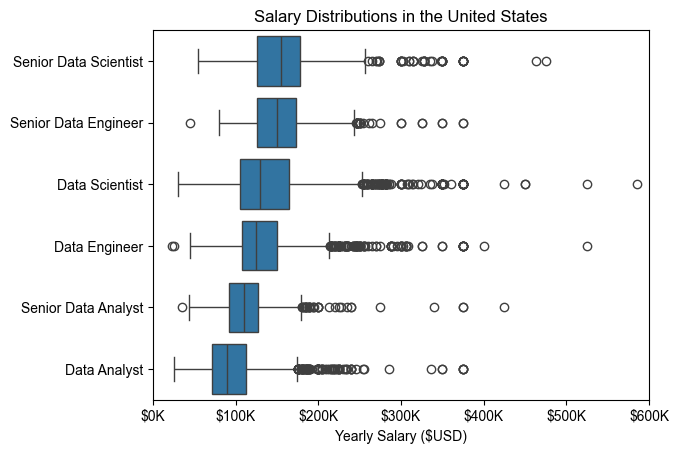

In [3]:
#Plot
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()


### Investigate Median Salary vs Skill for Data Analysts

In [4]:
df_US_top6 = df_US_top6.explode('job_skills')

#Numbers of skills for plotting
n = 10

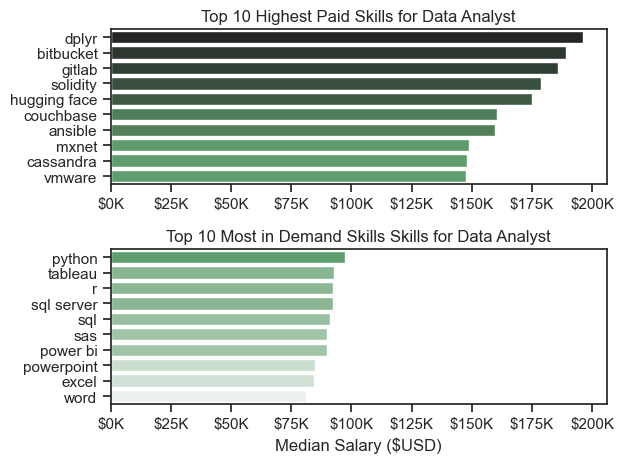

In [11]:
#Filtering by job_title for Data Analyst
job_title = 'Data Analyst'
df_DA_US = df_US_top6[['salary_year_avg', 'job_skills']][df_US_top6['job_title_short'] == job_title].copy()

df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_Top_Pay = df_DA_US_group.sort_values(by='median', ascending=False).head(n)
df_DA_Skills = df_DA_US_group.sort_values(by='count',ascending=False).head(n).sort_values(by='median', ascending=False)

fig, ax = plt.subplots(2,1)

sns.set_theme(style='ticks')

# Top highest paid skills for data analysts
sns.barplot(data=df_DA_Top_Pay, x='median', y=df_DA_Top_Pay.index, ax=ax[0], hue='median', palette='dark:g_r', legend=False)
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].set_title(f'Top {n} Highest Paid Skills for {job_title}')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# Top 5 Most in-demand skills for Data Analyst
sns.barplot(data=df_DA_Skills, x='median', y=df_DA_Skills.index, ax=ax[1], hue='median', palette='light:g', legend=False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_title(f'Top {n} Most in Demand Skills Skills for {job_title}')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.show

fig.tight_layout()

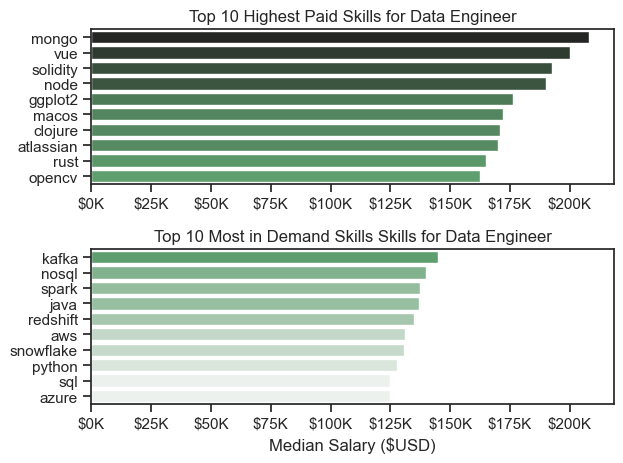

In [12]:
#Filtering by job_title for Data Engineers
job_title = 'Data Engineer'
df_DE_US = df_US_top6[['salary_year_avg', 'job_skills']][df_US_top6['job_title_short'] == job_title].copy()

df_DE_US_group = df_DE_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DS_Top_Pay = df_DE_US_group.sort_values(by='median', ascending=False).head(n)
df_DS_Skills = df_DE_US_group.sort_values(by='count',ascending=False).head(n).sort_values(by='median', ascending=False)

fig, ax = plt.subplots(2,1)

sns.set_theme(style='ticks')

# Top 5 highest paid skills for data Engineer
sns.barplot(data=df_DS_Top_Pay, x='median', y=df_DS_Top_Pay.index, ax=ax[0], hue='median', palette='dark:g_r', legend=False)
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].set_title(f'Top {n} Highest Paid Skills for {job_title}')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# Top 5 Most in-demand skills for Data Engineer
sns.barplot(data=df_DS_Skills, x='median', y=df_DS_Skills.index, ax=ax[1], hue='median', palette='light:g', legend=False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_title(f'Top {n} Most in Demand Skills Skills for {job_title}')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.show

fig.tight_layout()

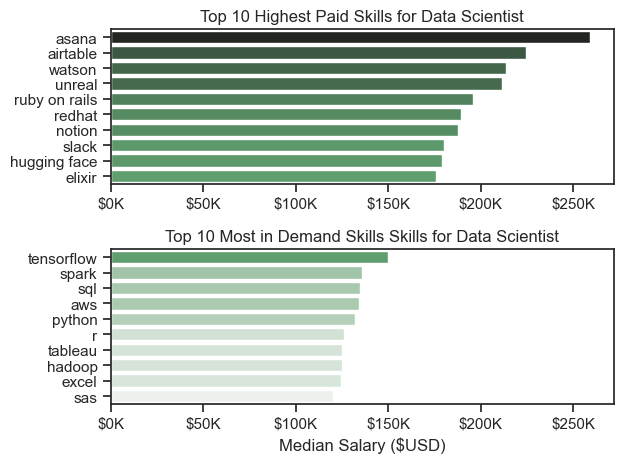

In [13]:
#Filtering by job_title for Data Scientist
job_title = 'Data Scientist'
df_DS_US = df_US_top6[['salary_year_avg', 'job_skills']][df_US_top6['job_title_short'] == job_title].copy()

df_DS_US_group = df_DS_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DS_Top_Pay = df_DS_US_group.sort_values(by='median', ascending=False).head(n)
df_DS_Skills = df_DS_US_group.sort_values(by='count',ascending=False).head(n).sort_values(by='median', ascending=False)

fig, ax = plt.subplots(2,1)

sns.set_theme(style='ticks')

# Top 5 highest paid skills for data Engineer
sns.barplot(data=df_DS_Top_Pay, x='median', y=df_DS_Top_Pay.index, ax=ax[0], hue='median', palette='dark:g_r', legend=False)
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].set_title(f'Top {n} Highest Paid Skills for {job_title}')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# Top 5 Most in-demand skills for Data Engineer
sns.barplot(data=df_DS_Skills, x='median', y=df_DS_Skills.index, ax=ax[1], hue='median', palette='light:g', legend=False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_title(f'Top {n} Most in Demand Skills Skills for {job_title}')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.show

fig.tight_layout()